In [126]:
from google.colab import files
files.upload()

Saving sample_submission.csv to sample_submission.csv


{'sample_submission.csv': b'ID,segment\ntest-23855,0.525372785748914\ntest-23854,0.619454629952088\ntest-23857,0.93861232814379\ntest-23856,0.879427335690707\ntest-23851,0.351804289035499\ntest-23850,0.365936555201188\ntest-23853,0.0667171543464065\ntest-23852,0.930517066037282\ntest-23859,0.453731381800026\ntest-23858,0.269238861743361\ntest-611,0.894307801965624\ntest-9038,0.645924306707457\ntest-9039,0.902757911244407\ntest-9032,0.283375830389559\ntest-9033,0.897921683965251\ntest-9030,0.846808307105675\ntest-9031,0.46793345734477\ntest-9036,0.111879752483219\ntest-9037,0.317133662058041\ntest-9034,0.880602941382676\ntest-9035,0.784454146167263\ntest-67729,0.986351133091375\ntest-57532,0.255986077012494\ntest-50747,0.752298912731931\ntest-50746,0.77201206353493\ntest-50745,0.135807644808665\ntest-50744,0.690877033863217\ntest-50743,0.0565200063865632\ntest-50742,0.838042222894728\ntest-50741,0.31296820519492\ntest-50740,0.0716095720417798\ntest-50749,0.990468867355958\ntest-50748,0.

In [79]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

train_data = pd.read_json('train_data.json',orient='index')
#test_data = pd.read_json('test_data.json',orient='index')
train_data.head()


,cities,dow,genres,segment,titles,tod
train-1,"gurgaon:55494,delhi:31892","1:3412,3:15878,2:1737,5:10975,4:20974,7:17820,...","Cricket:82379,Kabaddi:255,Reality:4751",neg,"Top Raids: Haryana vs Services SCB:103,Day 4: ...","10:26,13:331,12:323,20:21864,21:16233,17:7953,..."
train-10,"delhi:5862,nagar:8916,mumbai:1593","1:5745,3:3025,2:3346,5:123,4:3007,7:1108,6:10","Cricket:15640,Wildlife:730",neg,"Dhoni Quits Captaincy:148,Day 4: India Move in...","11:1661,10:384,20:401,21:798,22:221,16:525,19:..."
train-100,navi mumbai:4142,3:4142,"LiveTV:13,Football:4129",neg,"Star Sports 4:13,Manchester United vs Everton:...","1:1207,0:2406,2:529"
train-1000,"new delhi:4131,chennai:2878,navi mumbai:1339","1:658,3:5867,5:413,4:1339,7:71","TalkShow:658,Cricket:7690",neg,"SRH vs RCB:701,KKR vs KXIP:1042,MI vs SRH:2288...","11:71,20:2417,21:1042,23:2288,19:1872,8:658"
train-10000,"gurgaon:6077,chennai:4055","1:1641,2:480,4:1445,7:1663,6:4900","Drama:5503,Cricket:3283,Reality:1345",neg,"MI vs KKR:304,Yeh Rishta Kya Kehlata Hai:5449,...","20:158,22:4139,17:67,23:1510,19:288,18:56,0:23..."


In [0]:
test_prob = pd.read_csv('sample_submission.csv')

In [0]:
#test_data.head()

In [0]:
def split_data_to_columns(column):
    li = []
    for data in column:
        di = {}
        for datapoint in data.split(','):
            dp = datapoint.split(":")
            di[dp[0]] = dp[1]
        li.append(di)
    df_new = pd.DataFrame(li)
    df_new.fillna(0,inplace=True)
    return df_new

In [0]:
def add_new_features(df):
    columns = ["dow","tod","genres"]
    for column in columns:
        feature = split_data_to_columns(df[column])
        feature_df = feature.set_index(df.index)
        df= pd.concat([df, feature_df], axis=1, join_axes=[df.index])
        df.drop(columns=[column],inplace=True)
    return df

In [0]:
def split_data_to_rows(column):
    rows = []
    for data in column:
        for datapoint in data.split(','):
            dp = datapoint.split(":")
            rows.append(dp[0])
    ser = pd.Series(rows)
    return ser

0    0.923725
1    0.076275
Name: segment, dtype: float64


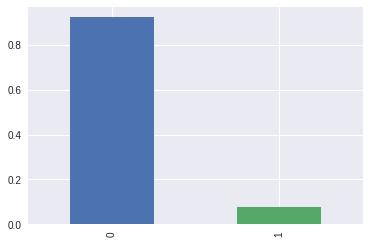

In [83]:
%matplotlib inline

train_data = train_data.replace({'segment':{'pos':1,'neg':0}})
#train_data['segment'].value_counts()
print(train_data['segment'].value_counts()/train_data.shape[0])
(train_data['segment'].value_counts()/train_data.shape[0]).plot.bar()

In [0]:
train_data = train_data.drop('cities', axis = 1)
train_data = train_data.drop('titles', axis = 1)
train_data_new = add_new_features(train_data)
#X_data1 = X_data_new.drop('titles', axis = 1).astype(int)
train_data_new = train_data_new.astype(int)

In [85]:
data = train_data_new.iloc[:, :8]
data.columns = ['segment', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
data.head()

,segment,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
train-1,0,3412,1737,15878,20974,10975,16580,17820
train-10,0,5745,3346,3025,3007,123,10,1108
train-100,0,0,0,4142,0,0,0,0
train-1000,0,658,0,5867,1339,413,0,71
train-10000,0,1641,480,0,1445,0,4900,1663


In [86]:
data1 = train_data_new.iloc[:, 8:32]
data1.columns



Index(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '3', '4', '5', '6', '7', '8', '9'],
      dtype='object')

In [87]:
time_ = ['Night','Morning','Noon','Evening']

data1['Night'] = data1[['0','1','2','3','4','5']].sum(axis=1)
data1['Morning'] = data1[['6','7','8','9','10','11']].sum(axis=1)
data1['Noon'] = data1[['12','13','14','15','16','17']].sum(axis=1)
data1['Evening'] = data1[['18','19','20','21','22','23']].sum(axis=1)
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [88]:
data1.drop(columns= ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'], axis = 0, inplace = True)
data1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Night,Morning,Noon,Evening
train-1,2363,26,15429,69559
train-10,4447,2660,1726,7528
train-100,4142,0,0,0
train-1000,0,729,0,7619
train-10000,2395,0,1426,6308


In [89]:
sum_time_ = [0,0,0,0]

for i in range(0,4):
    sum_time_[i] = data1[data1.columns[i]].sum()
    
sum_time_

[545548434, 666613752, 1426059749, 1610752873]

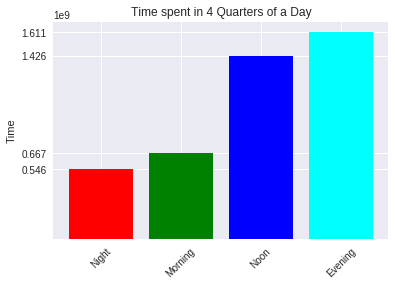

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

plt.bar(data1.columns, sum_time_, align='center', color=['red', 'green', 'blue', 'cyan'])
plt.xticks(data1.columns, rotation=45) #Replace default x-ticks with xs, then replace xs with labels

plt.ylabel('Time')
plt.title('Time spent in 4 Quarters of a Day')

plt.yticks(sum_time_)

plt.show()


In [91]:
data_new = pd.concat([data, data1, train_data_new.iloc[:, 32:]], axis=1, join_axes=[data.index])
data_new.head()

,segment,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Night,Morning,...,Sport,Swimming,Table Tennis,TalkShow,Teen,Tennis,Thriller,Travel,Volleyball,Wildlife
train-1,0,3412,1737,15878,20974,10975,16580,17820,2363,26,...,0,0,0,0,0,0,0,0,0,0
train-10,0,5745,3346,3025,3007,123,10,1108,4447,2660,...,0,0,0,0,0,0,0,0,0,730
train-100,0,0,0,4142,0,0,0,0,4142,0,...,0,0,0,0,0,0,0,0,0,0
train-1000,0,658,0,5867,1339,413,0,71,0,729,...,0,0,0,658,0,0,0,0,0,0
train-10000,0,1641,480,0,1445,0,4900,1663,2395,0,...,0,0,0,0,0,0,0,0,0,0


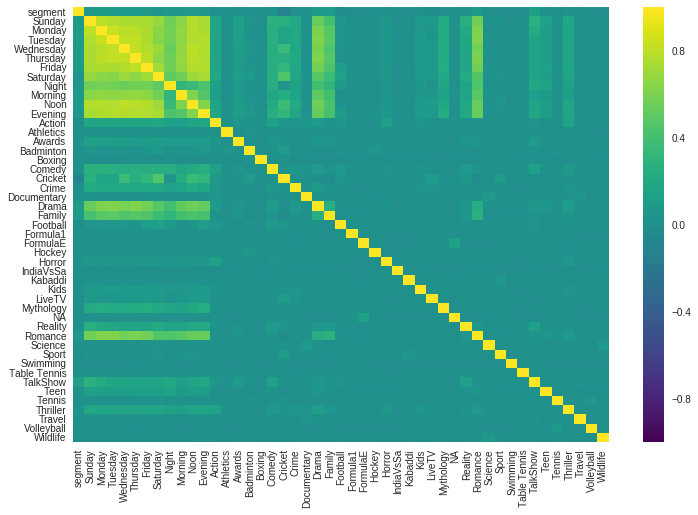

In [92]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(data_new.corr(), cmap='viridis')

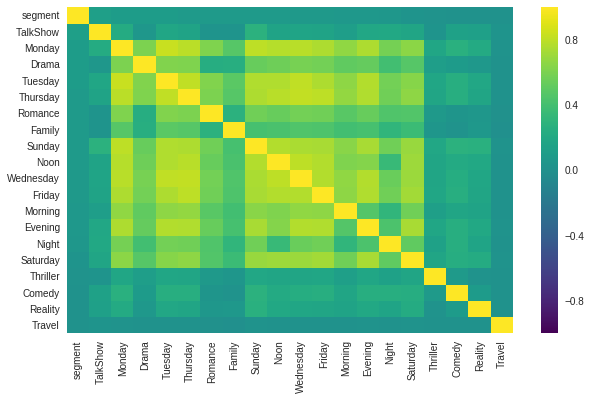

In [93]:
k = 20 #number of variables for heatmap
cols = data_new.corr().nlargest(k, 'segment')['segment'].index
cm = data_new[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, cmap = 'viridis')

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [0]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [0]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

nof_list=[20,30,40,45,47]
high_score=0
nof=0

In [0]:
#Code begins here
X = data_new.drop(['segment'],1)
y = data_new[['segment']].copy()

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=0) 

In [111]:
for n in nof_list:
    
    model =DecisionTreeClassifier(criterion='entropy')
    rfe = RFE(model, n)
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe, y_train)
    
    if roc_auc_score(y_test, model.predict(X_test_rfe)) > high_score:
        high_score, nof = roc_auc_score(y_test, model.predict(X_test_rfe)), n


print("Number of Features: ", nof)
print("Roc_Auc Score: ", round(high_score, 2))


confusion_mat = confusion_matrix(y_test, model.predict(X_test_rfe))
print("Confusion Matrix:\n", confusion_mat)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Number of Features:  30
Roc_Auc Score:  0.56
Confusion Matrix:
 [[51326  4136]
 [ 3718   820]]


In [115]:
from sklearn.ensemble import RandomForestClassifier

#for n in nof_list:
model =RandomForestClassifier(max_depth = 20, random_state=0)
rfe = RFE(model, 40)
X_train_rfe = rfe.fit_transform(X_train,y_train)
X_test_rfe = rfe.transform(X_test)
model.fit(X_train_rfe, y_train)
high_score = roc_auc_score(y_test, model.predict(X_test_rfe))
recall = recall_score(y_test, model.predict(X_test_rfe))
precision = precision_score(y_test, model.predict(X_test_rfe))
f1 = f1_score(y_test, model.predict(X_test_rfe))
confusion_mat = confusion_matrix(y_test, model.predict(X_test_rfe))



print("Number of Features: ", nof)
print("Roc_Auc Score: ", round(high_score, 2))
print("Recall: ", round(recall, 4))
print("Precision: ", round(precision, 4))
print("F1 score: ", round(f1, 4))
print("Confusion Matrix:\n", confusion_mat)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/fo

Number of Features:  30
Roc_Auc Score:  0.51
Recall:  0.0196
Precision:  0.2871
F1 score:  0.0367
Confusion Matrix:
 [[55241   221]
 [ 4449    89]]


In [117]:

rf_clf=RandomForestClassifier(n_estimators=100, random_state=0)

xgb_clf = XGBClassifier(base_estimator=rf_clf, random_state=0)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
xgb_score = xgb_clf.score(X_test, y_test)

accuracy = xgb_clf.score(X_test, y_test)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Random Forest Score with XGBOOSTING: ", xgb_score)


print("Accuracy: ", round(accuracy, 4))
print("Recall: ", round(recall, 4))
print("Precision: ", round(precision, 4))
print("F1 score: ", round(f1, 4))
print("Confusion Matrix:\n", confusion_mat)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Random Forest Score with XGBOOSTING:  0.92435
Accuracy:  0.9244
Recall:  0.0007
Precision:  0.4286
F1 score:  0.0013
Confusion Matrix:
 [[55458     4]
 [ 4535     3]]


In [118]:

X = data.drop(['segment'],1)
y = data[['segment']].copy()

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=0) 

smote = SMOTE(random_state = 0)
X_sample, y_sample =  smote.fit_sample(X_train, y_train)
print(type(X_train), type(y_train))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [119]:

X1 = data.drop(['segment'],1)
y1 = data[['segment']].copy()

X_train1, X_test1, y_train1, y_test1= train_test_split(X1, y1, test_size=0.3, random_state=0) 

smote = SMOTE(random_state = 0)
X_sample1, y_sample1 =  smote.fit_sample(X_train1, y_train1)
print(type(X_train1), type(y_train1), type(X_sample1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


In [120]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
model_smote = XGBClassifier(base_estimator=model, random_state=0)
model_smote.fit(X_sample1, y_sample1)
X_test = X_test[X_train1.columns]
y_pred = model_smote.predict(X_test)



ValueError: ignored

In [0]:
accuracy_smote = model_smote.score(X_test, y_test)
recall_smote = recall_score(y_test, y_pred)
precision_smote = precision_score(y_test, y_pred)
f1_smote = f1_score(y_test, y_pred)
confusion_mat_smote = confusion_matrix(y_test, y_pred)

print("Accuracy: ", round(accuracy_smote, 4))
print("Recall: ", round(recall_smote, 4))
print("Precision: ", round(precision_smote, 4))
print("F1 score: ", round(f1_smote, 4))
print("Confusion Matrix:\n", confusion_mat_smote)

In [0]:
#dt = DecisionTreeClassifier(criterion = "entropy", max_depth = 2)
#dt.fit(data_train, label_train)

clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train,y_train)

y_prediction_gini = clf_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test,y_prediction_gini)

accuracy_gini

0.8679666666666667

In [0]:
for i in range(1,66,5):
    clf_gini = DecisionTreeClassifier(criterion='entropy', max_depth = i)
    clf_gini.fit(X_train,y_train)
    y_prediction_gini = clf_gini.predict(X_test)
    accuracy_entropy = accuracy_score(y_test,y_prediction_gini)
    print(i)
    print("Accuracy Score: ", accuracy_entropy)
    print ("f1_score: ", f1_score(y_test, y_prediction_gini))
    print("ROC_AUC Score: ", roc_auc_score(y_test, y_prediction_gini))


1
Accuracy Score:  0.9250666666666667


C:\Users\Satyapriya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


f1_score:  0.0
ROC_AUC Score:  0.5
6
Accuracy Score:  0.9249166666666667
f1_score:  0.001330082021724673
ROC_AUC Score:  0.5002255295761443
11
Accuracy Score:  0.9199333333333334
f1_score:  0.046825396825396826
ROC_AUC Score:  0.5092852145438653
16
Accuracy Score:  0.90905
f1_score:  0.09786741610183501
ROC_AUC Score:  0.5215946412505681
21
Accuracy Score:  0.8978
f1_score:  0.13609467455621302
ROC_AUC Score:  0.5346256984844926
26
Accuracy Score:  0.8894833333333333
f1_score:  0.16116382036685642
ROC_AUC Score:  0.5458695740821861
31
Accuracy Score:  0.8827333333333334
f1_score:  0.16910722720831364
ROC_AUC Score:  0.5502951151479961
36
Accuracy Score:  0.8780833333333333
f1_score:  0.1727920389008255
ROC_AUC Score:  0.5526874597989924
41
Accuracy Score:  0.8750833333333333
f1_score:  0.171914705557397
ROC_AUC Score:  0.5524967775077478
46
Accuracy Score:  0.8761333333333333
f1_score:  0.18149779735682822
ROC_AUC Score:  0.5577655779866206
51
Accuracy Score:  0.8743333333333333
f1_sco

In [0]:
print (confusion_matrix(y_test, y_prediction_gini))

[[51567  3937]
 [ 3670   826]]


In [0]:
clf_gini

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
xgb_clf = XGBClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'), random_state=0)
xgb_clf.fit(X_train, y_train)
#xgb_score_train = xgb_clf.score(X_train_trns, y_train)
xgb_score = xgb_clf.score(X_test, y_test)
#print("Train Score with XGBOOSTING: ", xgb_score_train)
print("Score with XGBOOSTING: ", xgb_score)

C:\Users\Satyapriya\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Satyapriya\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score with XGBOOSTING:  0.92505


In [124]:
from sklearn.model_selection import GridSearchCV

#Parameter grid
parameter_grid = {"max_depth": [3, None],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Code starts here

clf = RandomForestClassifier(random_state = 0)
grid_search = GridSearchCV(estimator = clf, param_grid = parameter_grid)
grid_search.fit(X_train, y_train)
score_gs = grid_search.score(X_test, y_test)
y_pred = grid_search.predict_proba(X_test)
print("Testing score: %.4f " % score_gs)


recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Random Forest Score with XGBOOSTING: ", xgb_score)


print("Accuracy: ", round(score_gs, 4))
print("Recall: ", round(recall, 4))
print("Precision: ", round(precision, 4))
print("F1 score: ", round(f1, 4))
print("Confusion Matrix:\n", confusion_mat)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", Fu

Testing score: 0.9244 


ValueError: ignored

In [128]:
score = roc_auc_score(test_prob, y_pred)
score

TypeError: ignored